# Task instructions

Manually extract key financial data for the last three fiscal years from the 10-K filings of Microsoft, Tesla, and Apple. Following the data collection, use Python to analyze this data, focusing on trends and insights that could inform the development of an AI-powered financial chatbot.

### Step 1: Data extraction

- Navigate to the SEC's EDGAR database:

    - Microsoft
    - Tesla
    - Apple

- Manual extraction:

    - For each company, find the 10-K filings for the last three fiscal years.
    - Extract the following financial figures: Total Revenue, Net Income, Total Assets, Total Liabilities, and Cash Flow from Operating Activities.

- Organize Your Data:

    - Compile the extracted data into an Excel spreadsheet for easy reference during your Python analysis.

### Step 2: Analysis

In [8]:
# Import libraries

import pandas as pd

In [9]:
# Load CSV file
file_path = '/Users/jahdovanterpool/Downloads/BCGX 10-K Annual Reports.csv'
df = pd.read_csv(file_path,index_col=False)

# Remove unwanted index column
#df.drop(df.columns[0],axis=1,inplace=True)
df.sample()

,Company,Year,Total Revenue (USD M),Net Income (USD M),Total Assets (USD M),Total Liabilities (USD M),Cash Flow from Operating Activities,Revenue Growth (%),Net Income Growth (%),Profit Margin (%),Debt_to_Assets (%)
8,Tesla,2023,96773,15002,106838,41507,13257,18.795267,19.480726,15.502258,38.850409


In [10]:
# Analyze trend

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 11 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Company                              9 non-null      object 
 1   Year                                 9 non-null      int64  
 2   Total Revenue (USD M)                9 non-null      int64  
 3   Net Income (USD M)                   9 non-null      int64  
 4   Total Assets (USD M)                 9 non-null      int64  
 5   Total Liabilities (USD M)            9 non-null      int64  
 6   Cash Flow from Operating Activities  9 non-null      int64  
 7   Revenue Growth (%)                   9 non-null      float64
 8   Net Income Growth (%)                9 non-null      float64
 9   Profit Margin (%)                    9 non-null      float64
 10  Debt_to_Assets (%)                   9 non-null      float64
dtypes: float64(4), int64(6), object(1)
m

In [11]:
# Remove '$' and ',' from values in order to convert them to a numerical values instead of a string

# list the columns
df.columns

# Create a list of columns i want to clean
cols_to_clean = ['Total Revenue (USD M)', 'Net Income (USD M)',
       'Total Assets (USD M)', 'Total Liabilities (USD M)',
       'Cash Flow from Operating Activities']

# Loop through each column and remove unwanted characters and convert elements to float
for col in cols_to_clean:
    df[col] = df[col].replace(r'[\$,]','',regex=True).astype(float)

df.sample()

,Company,Year,Total Revenue (USD M),Net Income (USD M),Total Assets (USD M),Total Liabilities (USD M),Cash Flow from Operating Activities,Revenue Growth (%),Net Income Growth (%),Profit Margin (%),Debt_to_Assets (%)
1,Apple,2022,394328.0,99803.0,352755.0,302083.0,122151.0,7.793788,5.410858,25.309641,85.635356


In [12]:
# Calculate the year-over-year changes
"""
YoY Change = ((Current year value - Previous year value) / Previous year value) * 100
"""

df ['Revenue Growth (%)'] = df.groupby(['Company'])['Total Revenue (USD M)'].pct_change() * 100
df['Net Income Growth (%)'] = df.groupby(['Company'])['Net Income (USD M)'].pct_change() * 100

# Calculate the profit Margin (%)

df['Profit Margin (%)'] = (df['Net Income (USD M)'] / df['Total Revenue (USD M)']) * 100

# Calculate the debt to assets (%)

df['Debt_to_Assets (%)'] = (df['Total Liabilities (USD M)'] / df['Total Assets (USD M)']) * 100
# Fill NA values with a 0
df.fillna(0, inplace=True)
df.head()

,Company,Year,Total Revenue (USD M),Net Income (USD M),Total Assets (USD M),Total Liabilities (USD M),Cash Flow from Operating Activities,Revenue Growth (%),Net Income Growth (%),Profit Margin (%),Debt_to_Assets (%)
0,Apple,2021,365817.0,94680.0,337158.0,267980.0,104038.0,0.000000,0.000000,25.881793,79.482023
1,Apple,2022,394328.0,99803.0,352755.0,302083.0,122151.0,7.793788,5.410858,25.309641,85.635356
2,Apple,2023,383285.0,96995.0,352583.0,290437.0,110543.0,-2.800461,-2.813543,25.306234,82.374079
3,Microsoft,2021,168088.0,61271.0,333779.0,191791.0,76740.0,0.000000,0.000000,36.451740,57.460475
4,Microsoft,2022,198270.0,72738.0,364840.0,198298.0,89035.0,17.956071,18.715216,36.686337,54.352045


<Axes: xlabel='Year'>

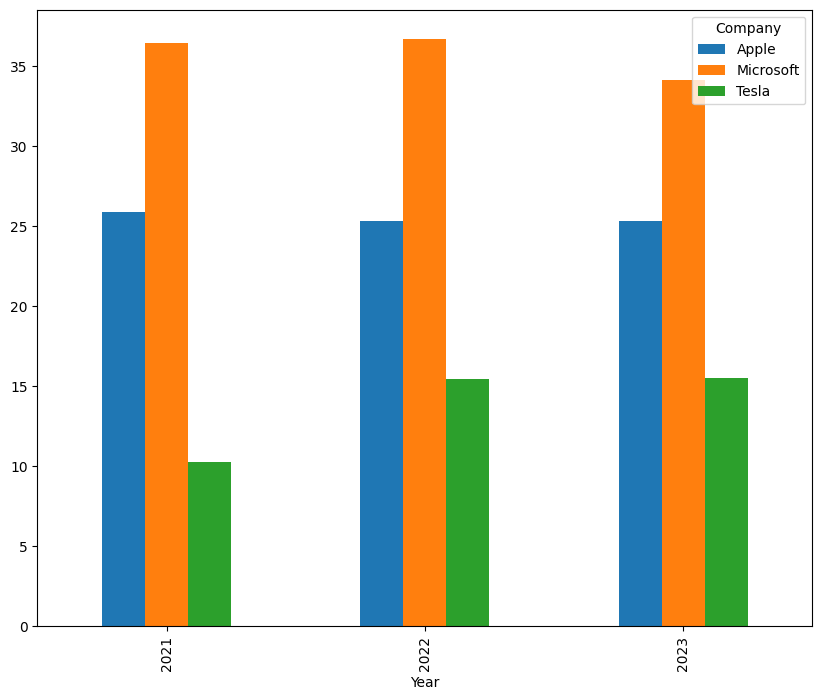

In [13]:
# Plot the profit margins

pivot_margin = df.pivot(index='Year', columns='Company' , values='Profit Margin (%)')
pivot_margin.plot(kind='bar', figsize=(10,8))

In [14]:
"""
Observations from bar graph:

Microsoft is the clear leader in profitability.Across all three years, Microsoft maintains the highest profit margin (~34–37%), indicating it converts a larger portion of its revenue into profit compared to Apple and Tesla. Its margins are also stable, which signals consistency.

Apple has solid but lower margins. Apple consistently shows margins around 25–26%, slightly below Microsoft but still strong.The stability suggests Apple runs a mature, efficient business model.

Tesla lags behind but shows improvement. Tesla’s profit margin starts much lower (~10% in 2021) but grows to around 15% by 2022–2023.

"""

'\nObservations from bar graph:\n\nMicrosoft is the clear leader in profitability.Across all three years, Microsoft maintains the highest profit margin (~34–37%), indicating it converts a larger portion of its revenue into profit compared to Apple and Tesla. Its margins are also stable, which signals consistency.\n\nApple has solid but lower margins. Apple consistently shows margins around 25–26%, slightly below Microsoft but still strong.The stability suggests Apple runs a mature, efficient business model.\n\nTesla lags behind but shows improvement. Tesla’s profit margin starts much lower (~10% in 2021) but grows to around 15% by 2022–2023.\n\n'

In [15]:
# Summarize findings for each company

summary = df.groupby('Company').agg({
    'Revenue Growth (%)': 'mean',
    'Net Income Growth (%)': 'mean'
}).reset_index()

summary

,Company,Revenue Growth (%),Net Income Growth (%)
0,Apple,1.664442,0.865772
1,Microsoft,8.279367,6.065639
2,Tesla,23.382306,48.995236


In [16]:
"""
Observations from the summary:

Apple is profitable but the growth is flat. This flat growth might be a result of it already being a mature company

Microsoft seems to show healthy growth

Tesla shows explosive growth but their earning seem to jump around alot (49%) compared to a company like apple (0.87%)

"""

'\nObservations from the summary:\n\nApple is profitable but the growth is flat. This flat growth might be a result of it already being a mature company\n\nMicrosoft seems to show healthy growth\n\nTesla shows explosive growth but their earning seem to jump around alot (49%) compared to a company like apple (0.87%)\n\n'

In [17]:
df.to_csv('/Users/jahdovanterpool/Downloads/BCGX 10-K Annual Reports.csv', index=False)